<a href="https://colab.research.google.com/github/hws2002/Deep_Learning_with_Keras/blob/main/Chpater12/Chapter12_2_deepdream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

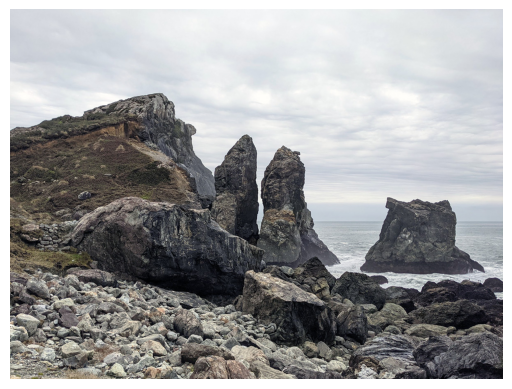

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

base_image_path = keras.utils.get_file(
    "coast.jpg", origin = "https://img-datasets.s3.amazonaws.com/coast.jpg"
)

plt.axis("off")
plt.imshow(keras.utils.load_img(base_image_path))

In [ ]:
from tensorflow.keras.applications import inception_v3

model = inception_v3.InceptionV3(weights = "imagenet", include_top = False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, None, None, 32) │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, None, None, 32) │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, None, None, 32) │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, None, None, 32) │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, None, None, 32) │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, None, None, 32) │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, None, None, 64) │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, None, None, 64) │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, None, None, 64) │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, None, None, 64) │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, None, None, 80) │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, None, None, 80) │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, None, None, 80) │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, None, None,     │        138,240 │ activation_3[0][0]     │
│                           │ 192)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, None, None,     │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │ 192)                   │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
layer_settings = { # 활성화를 최대화할 층과 전체 손실에 대한 가중치. 이 설정을 바꾸면 새로운 시각 효과를 얻을 수 있음.
    "mixed4" : 1.0,
    "mixed5" : 1.5,
    "mixed6" : 2.0,
    "mixed7" : 2.5,
}

outputs_dict = dict(
    [
        (layer.name, layer.output)
        for layer in [model.get_layer(name) for name in layer_settings.keys()]
    ]
)

feature_extractor = keras.Model(inputs = model.inputs, outputs = outputs_dict) # 각 타깃 층의 활성화 값을 (하나의 딕셔너리로) 반환하는 모델

In [ ]:
outputs_dict

{'mixed4': <KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, name=keras_tensor_132>,
 'mixed5': <KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, name=keras_tensor_164>,
 'mixed6': <KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, name=keras_tensor_196>,
 'mixed7': <KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, name=keras_tensor_228>}

손실함수를 정의하고

In [ ]:
import tensorflow as tf
def compute_loss(input_image):
  features = feature_extractor(input_image)
  loss = tf.zeros(shape=())
  for name in features.keys():
    coeff = layer_settings[name]
    activation = features[name]
    loss += coeff * tf.reduce_mean( tf.square(activation[:,2:-2, 2:-2, :])) # 경계 부근의 인공적인 패턴을 피하기 위해 테두리가 아닌 픽셀만 손실에 추가
  return loss

In [ ]:
@tf.function
def gradient_ascent_step(image, learning_rate):
  with tf.GradientTape() as tape:
    tape.watch(image) # 이미지 텐서는 텐서플로 변수가 아니기 때문에 명시적으로 지정함
    loss = compute_loss(image)
  grads = tape.gradient(loss, image) # 이미지에 대한 손실의 그레이디언트를 계산
  grads = tf.math.l2_normalize(grads)
  image += learning_rate * grads
  return loss, image

def gradient_ascent_loop(image, iterations, learning_rate, max_loss = None):
  for i in range(iterations):
    loss, image = gradient_ascent_step(image, learning_rate)
    if max_loss is not None and loss > max_loss:
      break
    print(f"... 스텝 {i}에서 손실 값 : {loss:.2f}")
  return image

파라미터 설정

In [ ]:
step = 20. # 경사 상승법 단계 크기 (learning_rate)
num_octave = 3
octave_scale = 1.4 # 연속적인 스케일 사이의 크기 비율
iterations = 30 # 스케일 단계마다 수행할 경사 상승법 단계 횟수
max_loss = 15. # 이보다 손실이 커지면 현재 스케일에서 경사 상승법 과정을 중지

이미지를 로드하고 저장하느 ㄴ유틸리티 함수

In [ ]:
import numpy as np

def preprocess_image(image_path):
  img = keras.utils.load_img(image_path)
  img = keras.utils.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  img = keras.applications.inception_v3.preprocess_input(img) # 적절한 범위로 픽셀 값을 조정해 줌.
  return img

def deprocess_image(img):
  img = img.reshape((img.shape[1], img.shape[2],3))
  img += 1.0 # InceptionV3 전처리 복원 (인셉션의 전처리 과정은 픽셀 값을 127.5로 나누어 0~2사이로 만든 다음,
  # 1을 빼서 -1~1사이로 만듦 (Xception, InceptionResNetV2, MobileNet, NASNet도 동일한 전처리 방식을 사용함)
  img *= 127.5
  img = np.clip(img, 0,255).astype("uint8") # [0,255]범위로 클리핑
  return img

In [ ]:
original_img = preprocess_image(base_image_path)
original_shape = original_img.shape[1:3]

successive_shapes = [original_shape] # 여러 옥타브에서 이미지 크기를 계산
for i in range(1, num_octave):
  shape = tuple( [ int(dim / (octave_scale ** i)) for dim in original_shape])
  successive_shapes.append(shape)
successive_shape = successive_shapes[::-1]
shrunk_original_img = tf.image.resize(original_img, successive_shapes[0])

img = tf.identity(original_img) # 이미지 복사


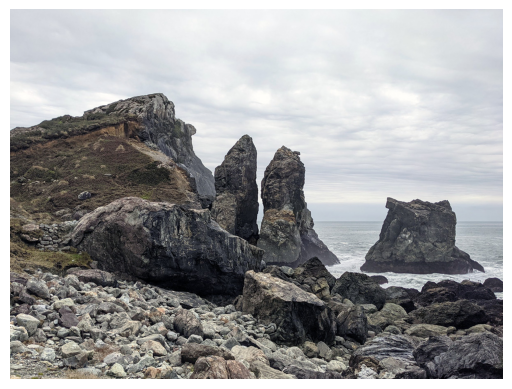

In [ ]:
plt.axis("off")
plt.imshow(deprocess_image(original_img))
plt.show()

In [ ]:
for i, shape in enumerate(successive_shapes):
  print(f"{shape} 크기의 {i}번째 옥타브 처리")
  img = tf.image.resize(img, shape) # 딥드림 이미지의 스케일을 높인다
  img = gradient_ascent_loop(img,iterations, step, max_loss) # 딥드림 진행
  upscaled_shrunk_original_img = tf.image.resize(shrunk_original_img, shape) # 작은 버전의 원본 이미지의 스케일을 높임
  same_size_original = tf.image.resize(original_img, shape) # 이 크기에 해당하는 고해상도 버전의 원본 이미지를 계산
  lost_detail = same_size_original - upscaled_shrunk_original_img
  img += lost_detail # 손실된 디테일을 딥드림 이미지에 다시 주입.

deep_dream_img = img
keras.utils.save_img("dream.png", deprocess_image(deep_dream_img.numpy())) # 최종 결과를 저장한다

(900, 1200) 크기의 0번째 옥타브 처리
... 스텝 0에서 손실 값 : 0.65
... 스텝 1에서 손실 값 : 0.83
... 스텝 2에서 손실 값 : 1.06
... 스텝 3에서 손실 값 : 1.34
... 스텝 4에서 손실 값 : 1.61
... 스텝 5에서 손실 값 : 1.88
... 스텝 6에서 손실 값 : 2.14
... 스텝 7에서 손실 값 : 2.40
... 스텝 8에서 손실 값 : 2.69
... 스텝 9에서 손실 값 : 2.95
... 스텝 10에서 손실 값 : 3.24
... 스텝 11에서 손실 값 : 3.51
... 스텝 12에서 손실 값 : 3.81
... 스텝 13에서 손실 값 : 4.09
... 스텝 14에서 손실 값 : 4.41
... 스텝 15에서 손실 값 : 4.69
... 스텝 16에서 손실 값 : 4.91
... 스텝 17에서 손실 값 : 5.24
... 스텝 18에서 손실 값 : 5.51
... 스텝 19에서 손실 값 : 5.85
... 스텝 20에서 손실 값 : 5.99
... 스텝 21에서 손실 값 : 6.44
... 스텝 22에서 손실 값 : 6.65
... 스텝 23에서 손실 값 : 7.06
... 스텝 24에서 손실 값 : 7.35
... 스텝 25에서 손실 값 : 7.69
... 스텝 26에서 손실 값 : 7.89
... 스텝 27에서 손실 값 : 8.34
... 스텝 28에서 손실 값 : 8.71
... 스텝 29에서 손실 값 : 9.12
(642, 857) 크기의 1번째 옥타브 처리
(459, 612) 크기의 2번째 옥타브 처리


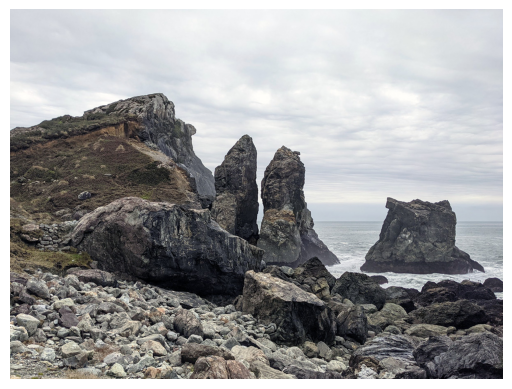

In [ ]:

plt.axis("off")
plt.imshow(deprocess_image(img.numpy()))
plt.show()

아까는 상위 층에 좀 더 높은 가중치를 적용했다면, 이번에는 하위 층에 좀 더 가중치를 두고 딥드림을 구현해보자

In [ ]:
layer_settings = { # 활성화를 최대화할 층과 전체 손실에 대한 가중치. 이 설정을 바꾸면 새로운 시각 효과를 얻을 수 있음.
    "mixed4" : 2.5,
    "mixed5" : 2.0,
    "mixed6" : 1.5,
    "mixed7" : 1.0,
}

In [ ]:
original_img = preprocess_image(base_image_path)
original_shape = original_img.shape[1:3]

successive_shapes = [original_shape] # 여러 옥타브에서 이미지 크기를 계산
for i in range(1, num_octave):
  shape = tuple( [ int(dim / (octave_scale ** i)) for dim in original_shape])
  successive_shapes.append(shape)
successive_shape = successive_shapes[::-1]
shrunk_original_img = tf.image.resize(original_img, successive_shapes[0])

img = tf.identity(original_img) # 이미지 복사
for i, shape in enumerate(successive_shapes):
  print(f"{shape} 크기의 {i}번째 옥타브 처리")
  img = tf.image.resize(img, shape) # 딥드림 이미지의 스케일을 높인다
  img = gradient_ascent_loop(img,iterations, step, max_loss) # 딥드림 진행
  upscaled_shrunk_original_img = tf.image.resize(shrunk_original_img, shape) # 작은 버전의 원본 이미지의 스케일을 높임
  same_size_original = tf.image.resize(original_img, shape) # 이 크기에 해당하는 고해상도 버전의 원본 이미지를 계산
  lost_detail = same_size_original - upscaled_shrunk_original_img
  img += lost_detail # 손실된 디테일을 딥드림 이미지에 다시 주입.

deep_dream_img = img
keras.utils.save_img("dream.png", deprocess_image(deep_dream_img.numpy())) # 최종 결과를 저장한다

(900, 1200) 크기의 0번째 옥타브 처리
... 스텝 0에서 손실 값 : 0.65
... 스텝 1에서 손실 값 : 0.83
... 스텝 2에서 손실 값 : 1.06
... 스텝 3에서 손실 값 : 1.34
... 스텝 4에서 손실 값 : 1.61
... 스텝 5에서 손실 값 : 1.87
... 스텝 6에서 손실 값 : 2.14
... 스텝 7에서 손실 값 : 2.41
... 스텝 8에서 손실 값 : 2.69
... 스텝 9에서 손실 값 : 2.96
... 스텝 10에서 손실 값 : 3.26
... 스텝 11에서 손실 값 : 3.53
... 스텝 12에서 손실 값 : 3.81
... 스텝 13에서 손실 값 : 4.10
... 스텝 14에서 손실 값 : 4.41
... 스텝 15에서 손실 값 : 4.68
... 스텝 16에서 손실 값 : 4.93
... 스텝 17에서 손실 값 : 5.24
... 스텝 18에서 손실 값 : 5.49
... 스텝 19에서 손실 값 : 5.82
... 스텝 20에서 손실 값 : 6.12
... 스텝 21에서 손실 값 : 6.37
... 스텝 22에서 손실 값 : 6.71
... 스텝 23에서 손실 값 : 7.00
... 스텝 24에서 손실 값 : 7.26
... 스텝 25에서 손실 값 : 7.65
... 스텝 26에서 손실 값 : 8.01
... 스텝 27에서 손실 값 : 8.39
... 스텝 28에서 손실 값 : 8.74
... 스텝 29에서 손실 값 : 9.14
(642, 857) 크기의 1번째 옥타브 처리
... 스텝 0에서 손실 값 : 1.00
... 스텝 1에서 손실 값 : 1.76
... 스텝 2에서 손실 값 : 2.40
... 스텝 3에서 손실 값 : 2.92
... 스텝 4에서 손실 값 : 3.38
... 스텝 5에서 손실 값 : 3.83
... 스텝 6에서 손실 값 : 4.39
... 스텝 7에서 손실 값 : 4.82
... 스텝 8에서 손실 값 : 5.33
... 스텝 9에서 손실 값 : 5.75
... 스텝 

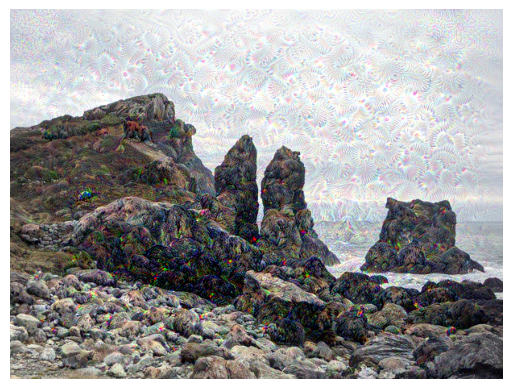

In [ ]:
plt.axis("off")
plt.imshow(deprocess_image(deep_dream_img.numpy()))
plt.show()

시각적으로는 큰 차이가 없어 보인다.